In [1]:
import os
import pickle
from kid_readout.utils import readoutnc
from kid_readout.analysis import noise_measurement
plt.rcParams['font.size'] = 11
import utilities

updated file list


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
data_directory = '/data/readout'
resonator_index = 13  # This should be the 164 MHz resonance, aka channel 8

with open('cw_ncs.pkl') as f:
    cw_ncs = pickle.load(f)
with open('bb_ncs.pkl') as f:
    bb_ncs = pickle.load(f)

save_directory = '../Max/2015-12-20_log-binned_before_pca'

The sweep/stream pairs consist of  
0 41 coarse off / short modulated on coarse  
1 41 fine off / long modulated off  
2 41 coarse on / short modulated on coarse  
3 41 fine on / long on  
4 38 fine on / long on  
5 35 fine on / long on  
6 32 fine on / long on  
7 29 fine on / long on  
8 26 fine on / long on  
9 23 fine on / long on

In [3]:
pca_NFFT = 2**15
index_a29 = 7

This is the highest optical power data that passes cuts:

In [20]:
cw_snm_a29_tt07 = noise_measurement.SweepNoiseMeasurement(cw_ncs[11],
                                                          sweep_group_index=index_a29,
                                                          timestream_group_index=index_a29,
                                                          resonator_index=resonator_index,
                                                          pca_NFFT=pca_NFFT,
                                                         )

This is the lowest-power data:

In [21]:
cw_snm_a29_tt17 = noise_measurement.SweepNoiseMeasurement(cw_ncs[1],
                                                          sweep_group_index=index_a29,
                                                          timestream_group_index=index_a29,
                                                          resonator_index=resonator_index,
                                                          pca_NFFT=pca_NFFT,
                                                         )

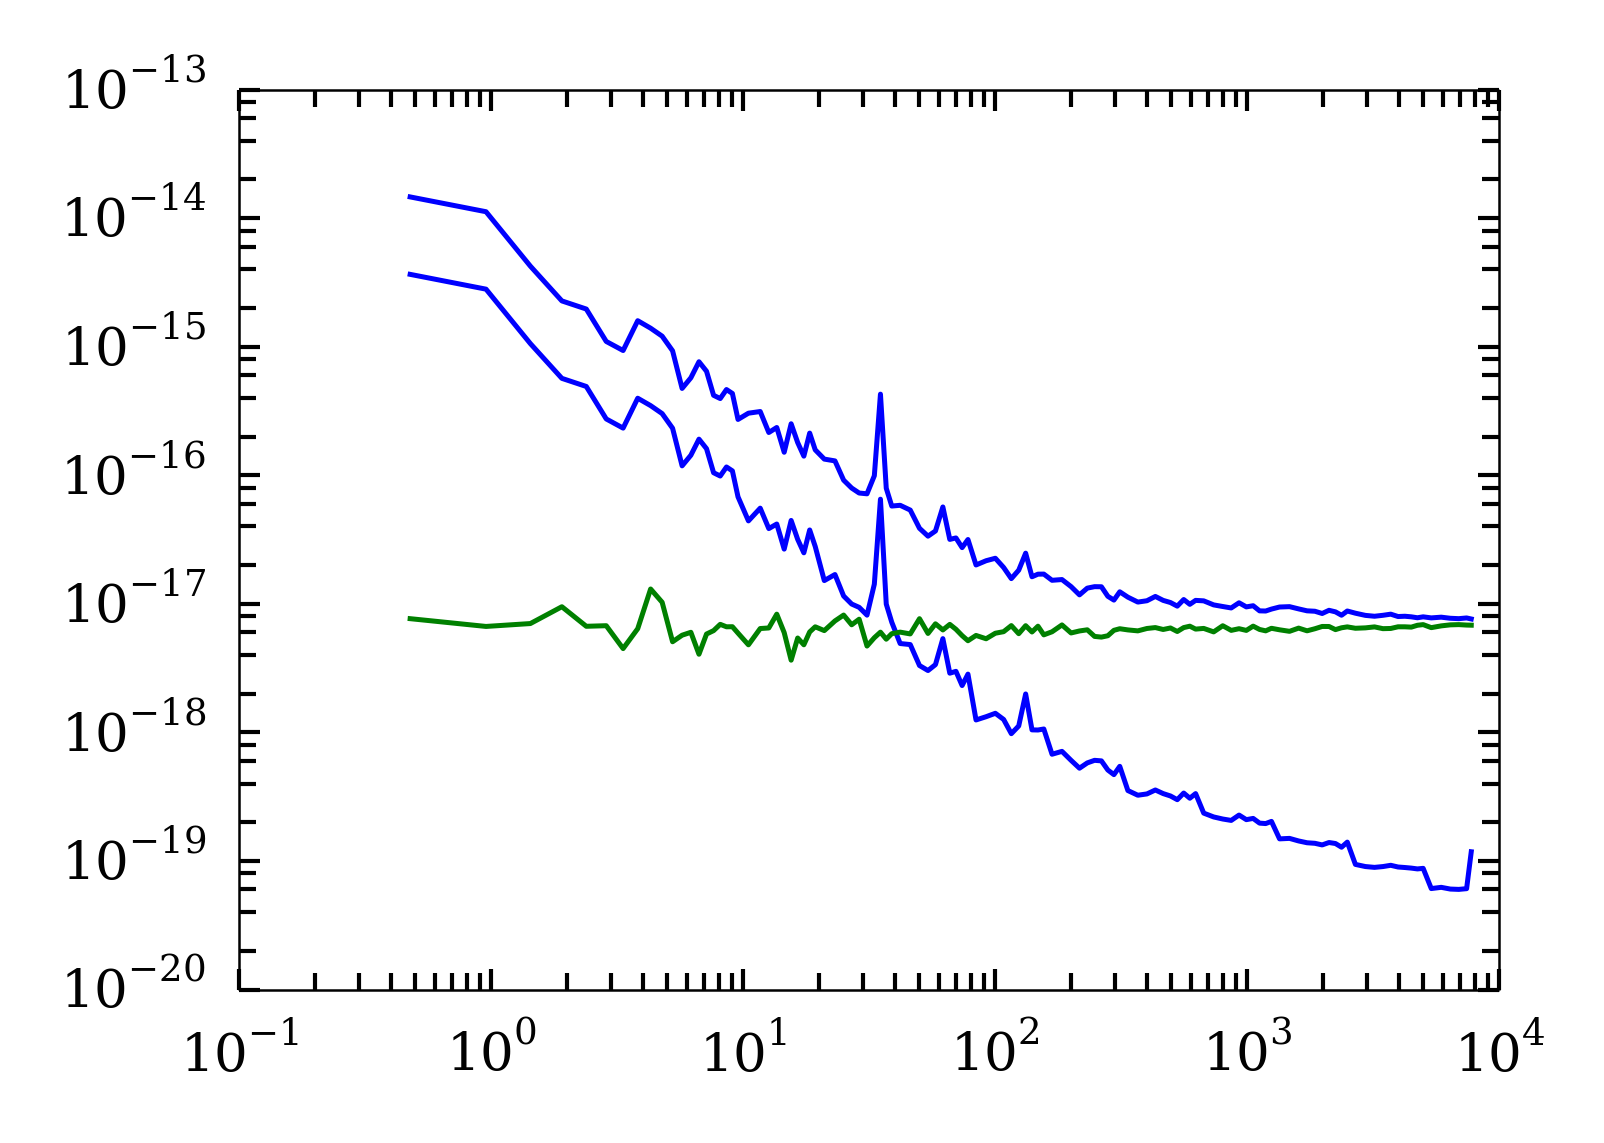

In [22]:
plt.loglog(cw_snm_a29_tt07.epca_freq, cw_snm_a29_tt07.epca_evals[1], '-b')
plt.loglog(cw_snm_a29_tt07.epca_freq, cw_snm_a29_tt07.epca_variance[1]**(1/2), '-b')
plt.loglog(cw_snm_a29_tt07.epca_freq, cw_snm_a29_tt07.epca_evals[0], '-g')



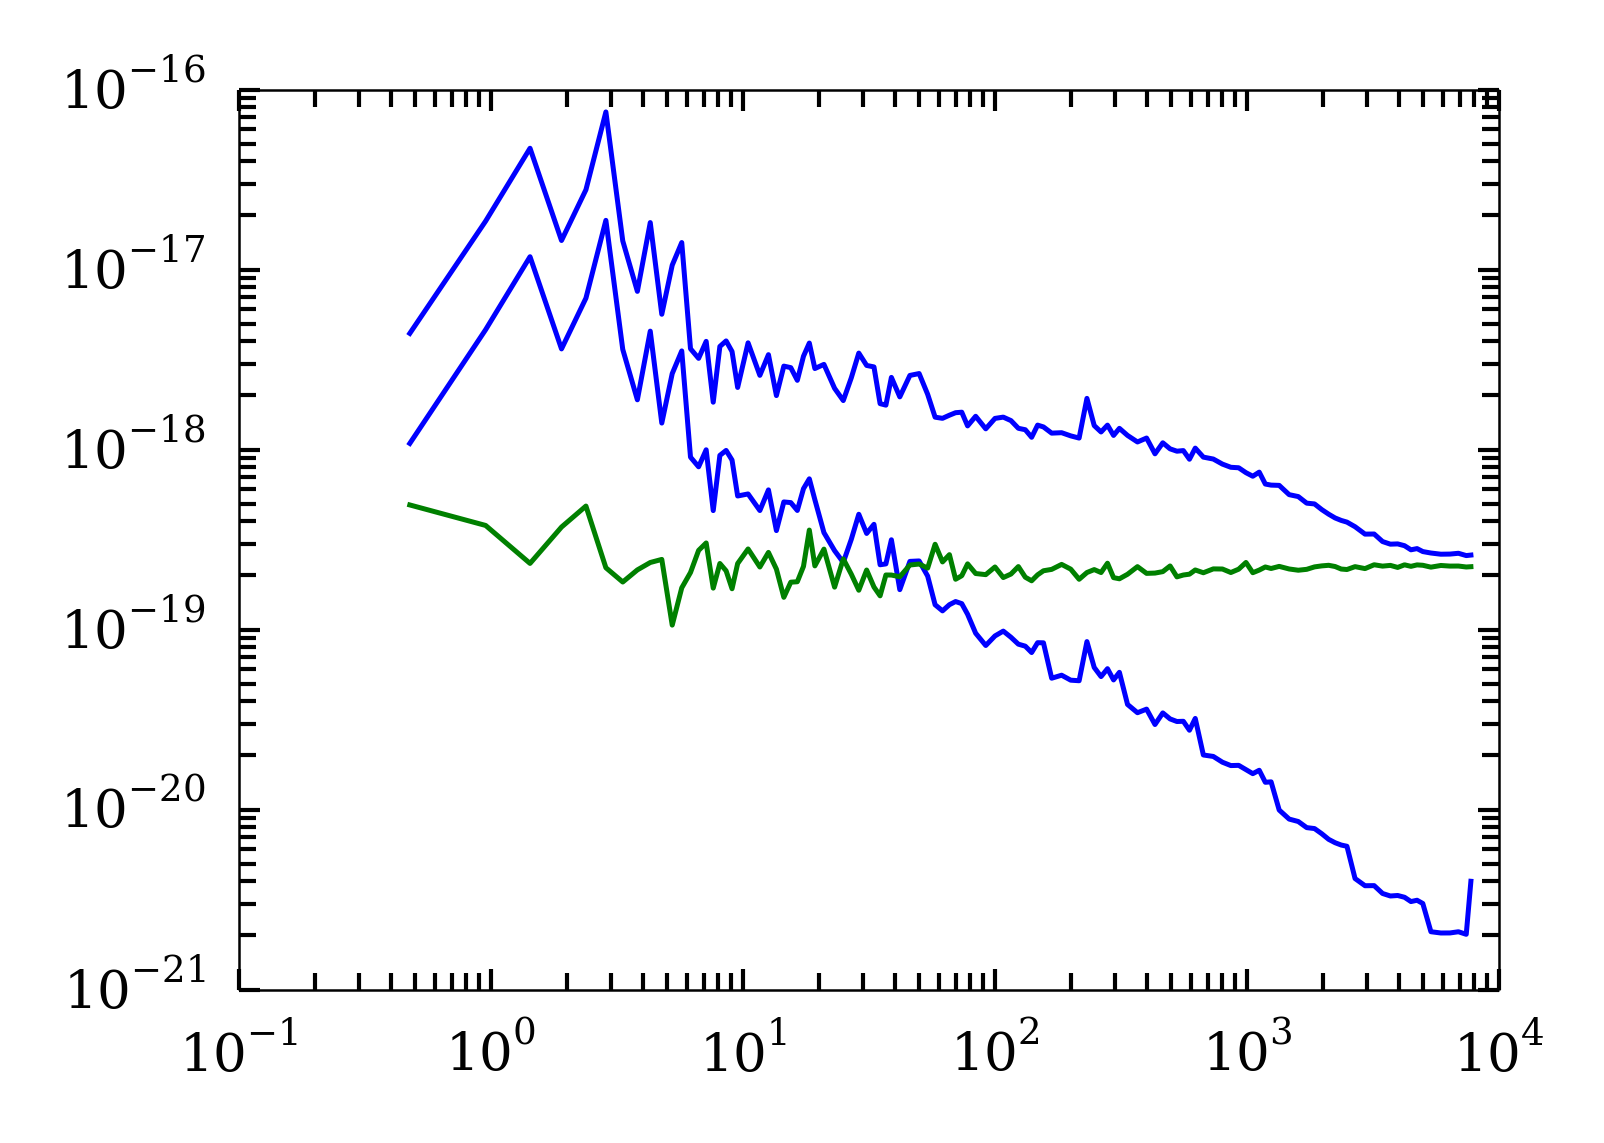

In [23]:
plt.loglog(cw_snm_a29_tt17.epca_freq, cw_snm_a29_tt17.epca_evals[1], '-b')
plt.loglog(cw_snm_a29_tt17.epca_freq, cw_snm_a29_tt17.epca_variance[1]**(1/2), '-b')
plt.loglog(cw_snm_a29_tt17.epca_freq, cw_snm_a29_tt17.epca_evals[0], '-g')


In [24]:
cw_snm_a29_tt07._close_files()
del(cw_snm_a29_tt07)
cw_snm_a29_tt17._close_files()
del(cw_snm_a29_tt17)

# Despiking broadband data

In [9]:
bb_snm_a29_tt06 = noise_measurement.SweepNoiseMeasurement(bb_ncs[-1],
                                                          sweep_group_index=index_a29,
                                                          timestream_group_index=index_a29,
                                                          resonator_index=resonator_index,
                                                          pca_NFFT=pca_NFFT,
                                                         )

In [10]:
n_masked = 4
f_mask = 10
bb_highest = ((bb_snm_a29_tt06.epca_freq <= f_mask).sum() +
               bb_snm_a29_tt06.epca_evals[1][bb_snm_a29_tt06.epca_freq > f_mask].argsort())[-n_masked:]

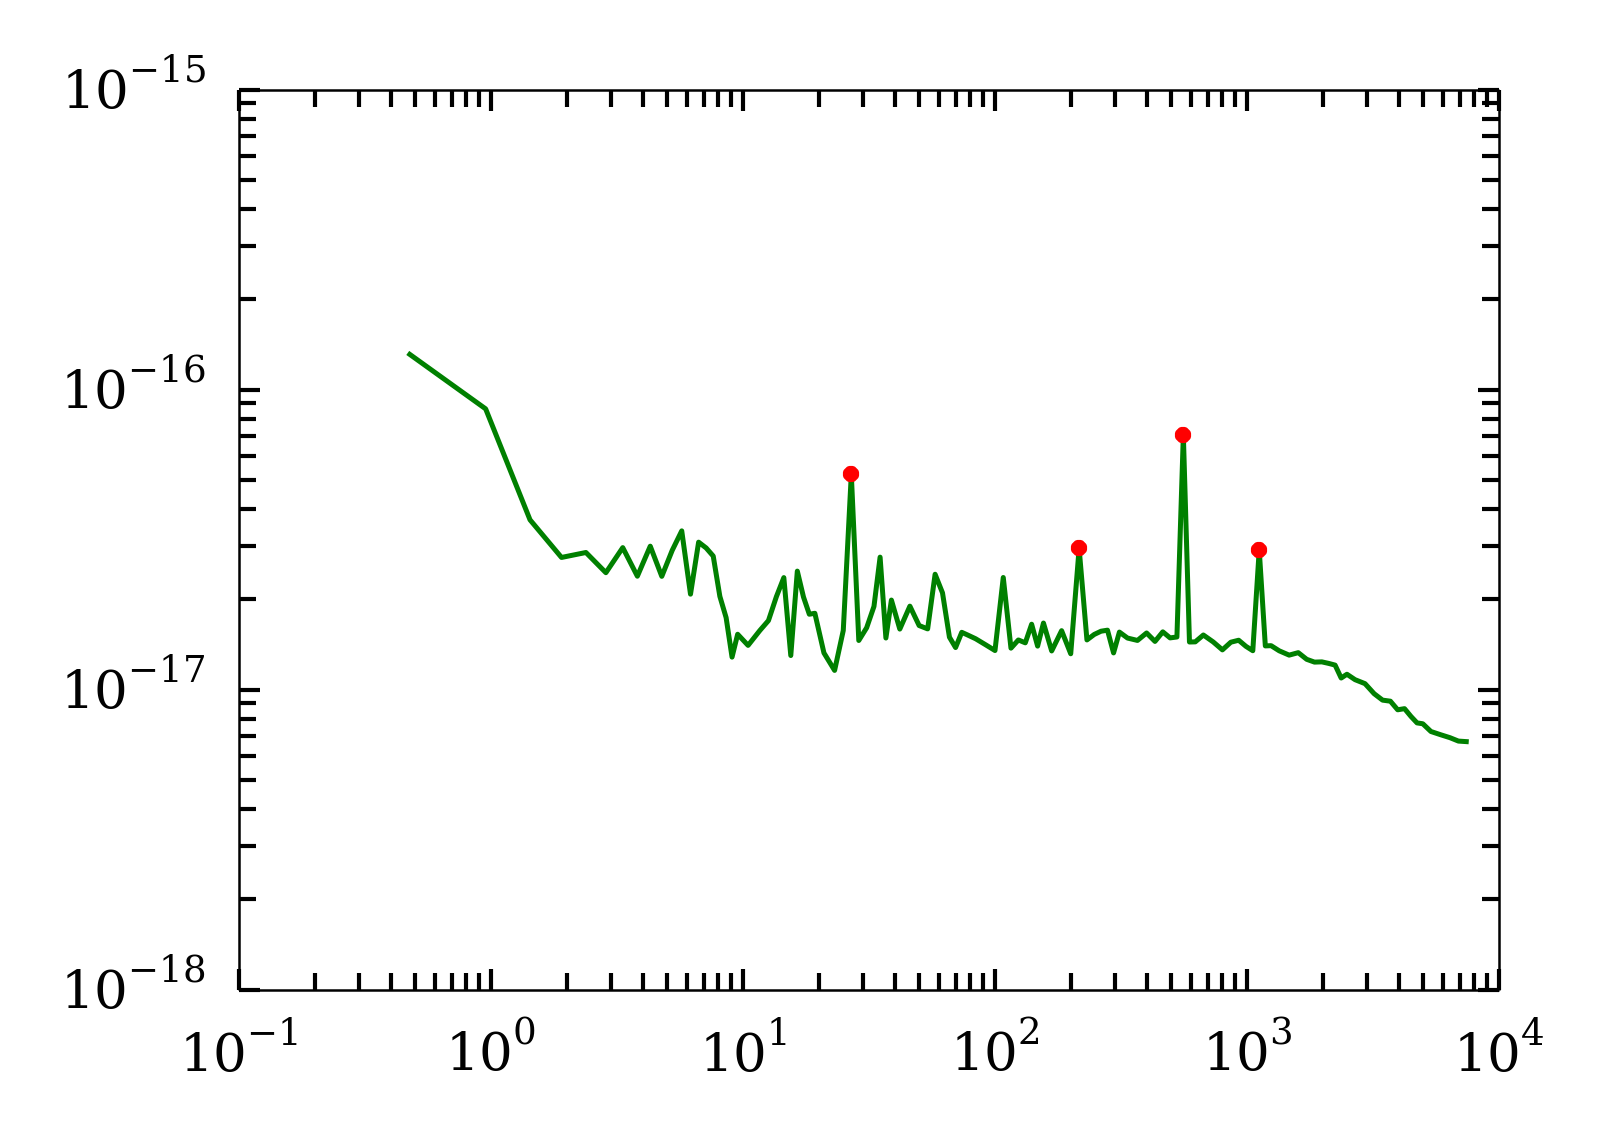

In [11]:
fig, ax = plt.subplots()

ax.loglog(bb_snm_a29_tt06.pca_freq, bb_snm_a29_tt06.pca_eigvals[1], '-g')
ax.loglog(bb_snm_a29_tt06.epca_freq[bb_highest],
          bb_snm_a29_tt06.epca_evals[1][bb_highest], '.r')

In [12]:
bb_snm_a29_tt06.epca_freq[sorted(bb_highest)]

array([   26.94129944,   216.00723267,   559.80682373,  1119.85206604])

In [13]:
bb_snm_a29_tt06._close_files()
del(bb_snm_a29_tt06)

# Create all SNMs and save data

In [14]:
bb_data = {}

# Exclude 2 * 9 turns and 2 * 8.5 turns
for bb_nc in bb_ncs[2:]:
    snm = noise_measurement.SweepNoiseMeasurement(bb_nc,
                                                  sweep_group_index=index_a29,
                                                  timestream_group_index=index_a29,
                                                  resonator_index=resonator_index,
                                                  pca_NFFT=pca_NFFT)
    total_turns = sum(snm.mmw_atten_turns)
    print("Turns: {}".format(total_turns))
    bb_data['{:02.0f}_dev'.format(total_turns)] = snm.epca_evals[1]
    bb_data['{:02.0f}_sigma'.format(total_turns)] = snm.epca_variance[1]**(1/2)
    bb_data['{:02.0f}_amp'.format(total_turns)] = snm.epca_evals[0]

# Take the identical data from the last SNM:
bb_data['f'] = snm.epca_freq
bb_data['counts'] = snm.epca_counts
bb_data['highest'] = bb_highest

with open(os.path.join(save_directory, 'bb_log-binned_2015-12-20.npz'), 'w') as f:
    np.savez(f, **bb_data)

Turns: 16.0
Turns: 15.0
Turns: 14.0
Turns: 13.0
Turns: 12.0
Turns: 11.0
Turns: 10.0
Turns: 9.0
Turns: 8.0
Turns: 7.0
Turns: 6.0


In [15]:
bbz = np.load(os.path.join(save_directory, 'bb_log-binned_2015-12-20.npz'))

In [18]:
cw_data = {}

# Exclude 2 * 9 turns and 2 * 3 turns
for cw_nc in cw_ncs[1:-1]:
    snm = noise_measurement.SweepNoiseMeasurement(cw_nc,
                                                  sweep_group_index=index_a29,
                                                  timestream_group_index=index_a29,
                                                  resonator_index=resonator_index,
                                                  pca_NFFT=pca_NFFT)
    total_turns = sum(snm.mmw_atten_turns)
    print("Turns: {}".format(total_turns))
    cw_data['{:02.0f}_dev'.format(total_turns)] = snm.epca_evals[1]
    cw_data['{:02.0f}_sigma'.format(total_turns)] = snm.epca_variance[1]**(1/2)
    cw_data['{:02.0f}_amp'.format(total_turns)] = snm.epca_evals[0]

# Take the identical data from the last SNM:
cw_data['f'] = snm.epca_freq
cw_data['counts'] = snm.epca_counts

with open(os.path.join(save_directory, 'cw_log-binned_2015-12-20.npz'), 'w') as f:
    np.savez(f, **cw_data)

Turns: 17.0
Turns: 16.0
Turns: 15.0
Turns: 14.0
Turns: 13.0
Turns: 12.0
Turns: 11.0
Turns: 10.0
Turns: 9.0
Turns: 8.0
Turns: 7.0


In [25]:
cwz = np.load(os.path.join(save_directory, 'cw_log-binned_2015-12-20.npz'))

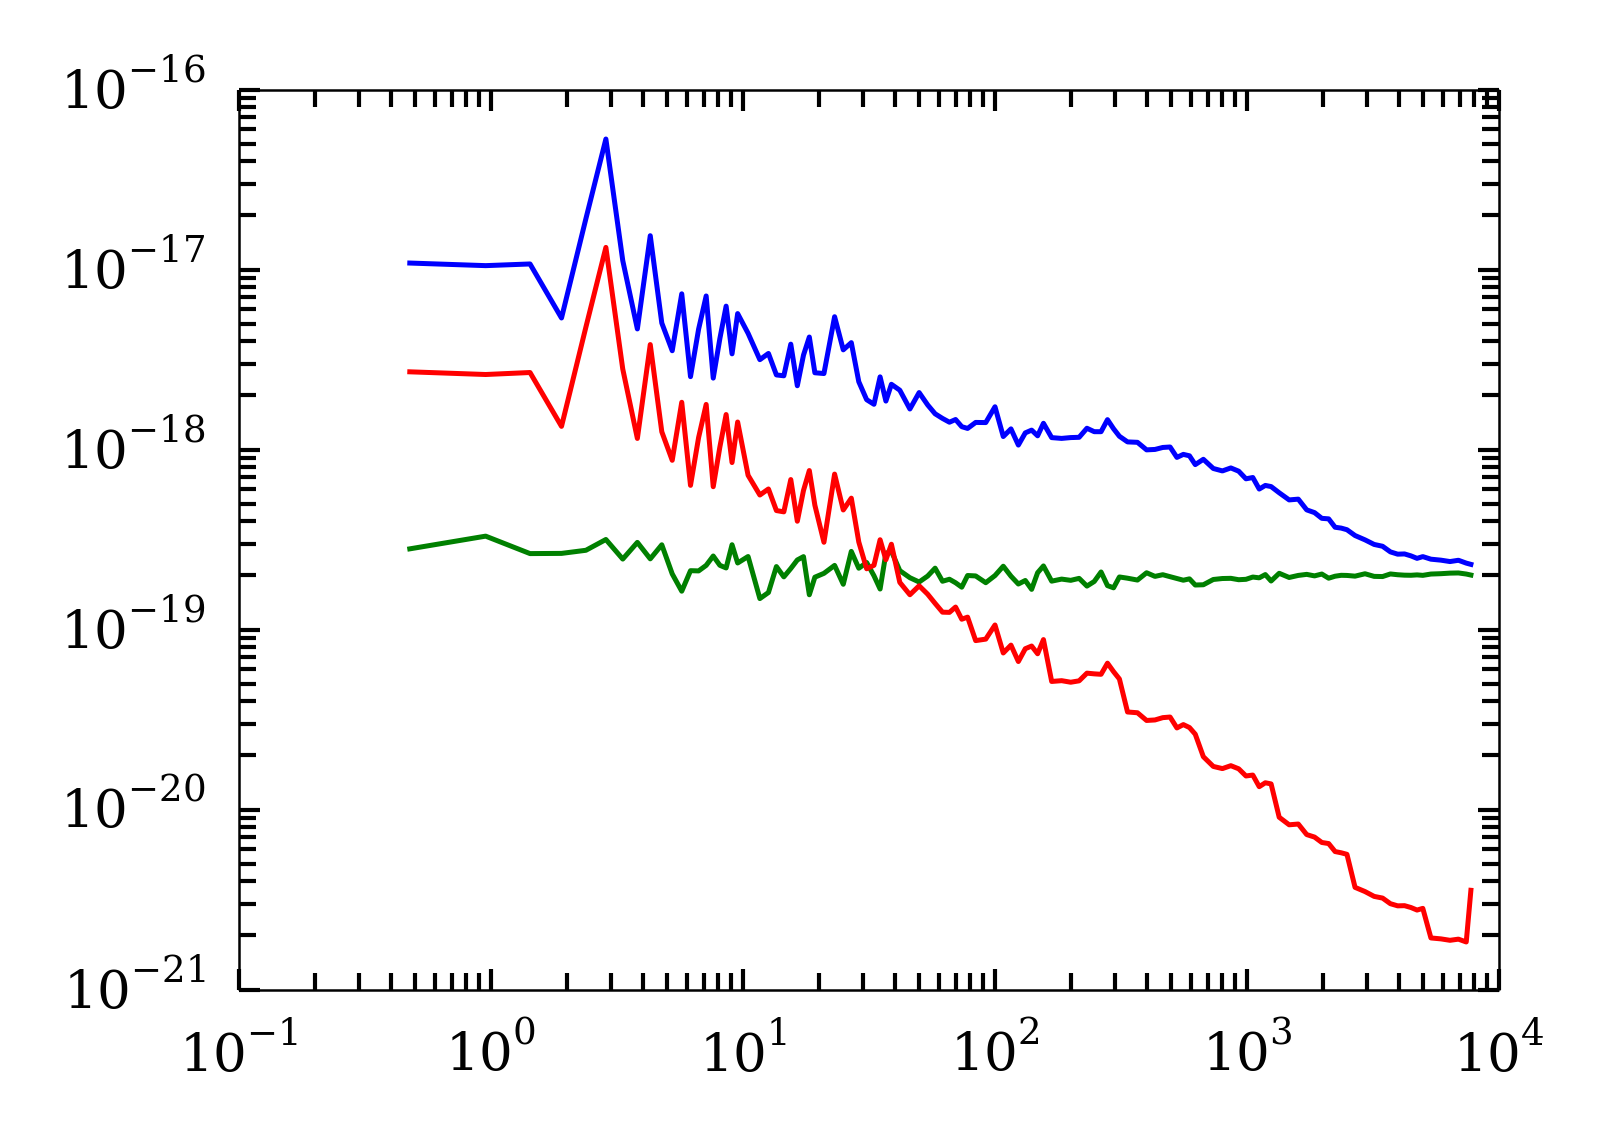

In [17]:
plt.loglog(bbz['f'], bbz['16_dev'])
plt.loglog(bbz['f'], bbz['16_amp'])
plt.loglog(bbz['f'], bbz['16_sigma'])

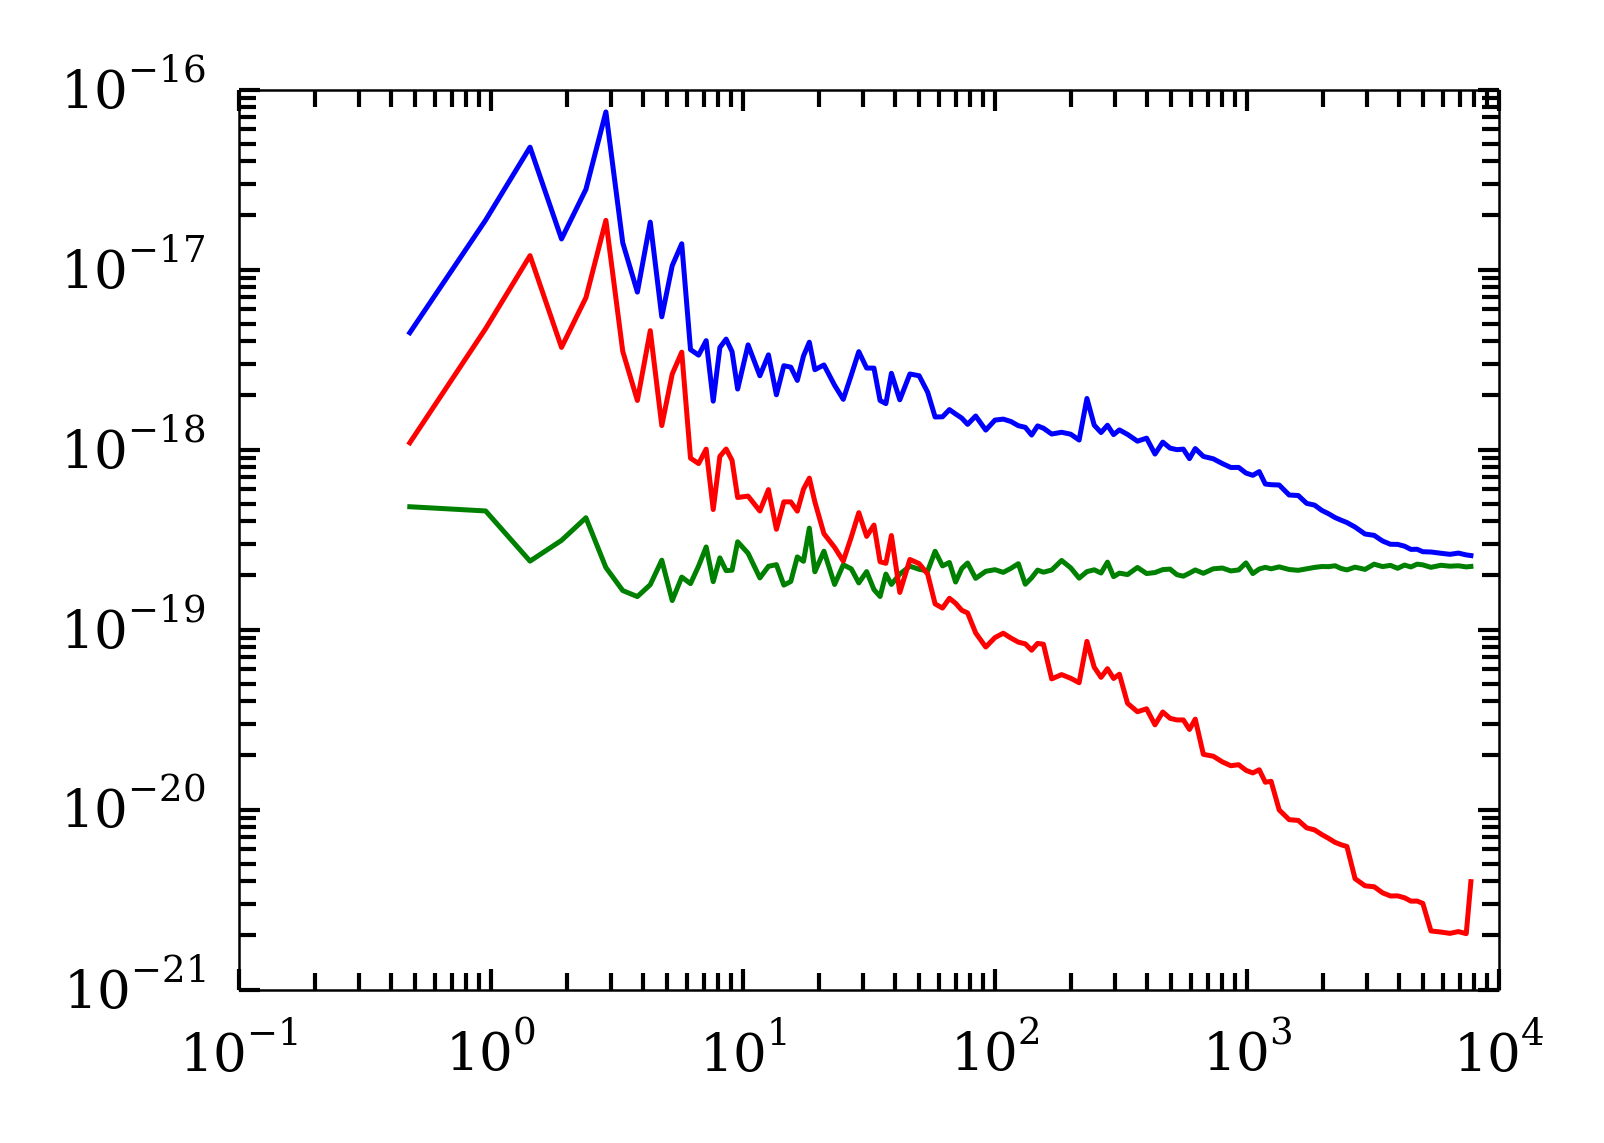

In [26]:
plt.loglog(cwz['f'], cwz['17_dev'])
plt.loglog(cwz['f'], cwz['17_amp'])
plt.loglog(cwz['f'], cwz['17_sigma'])

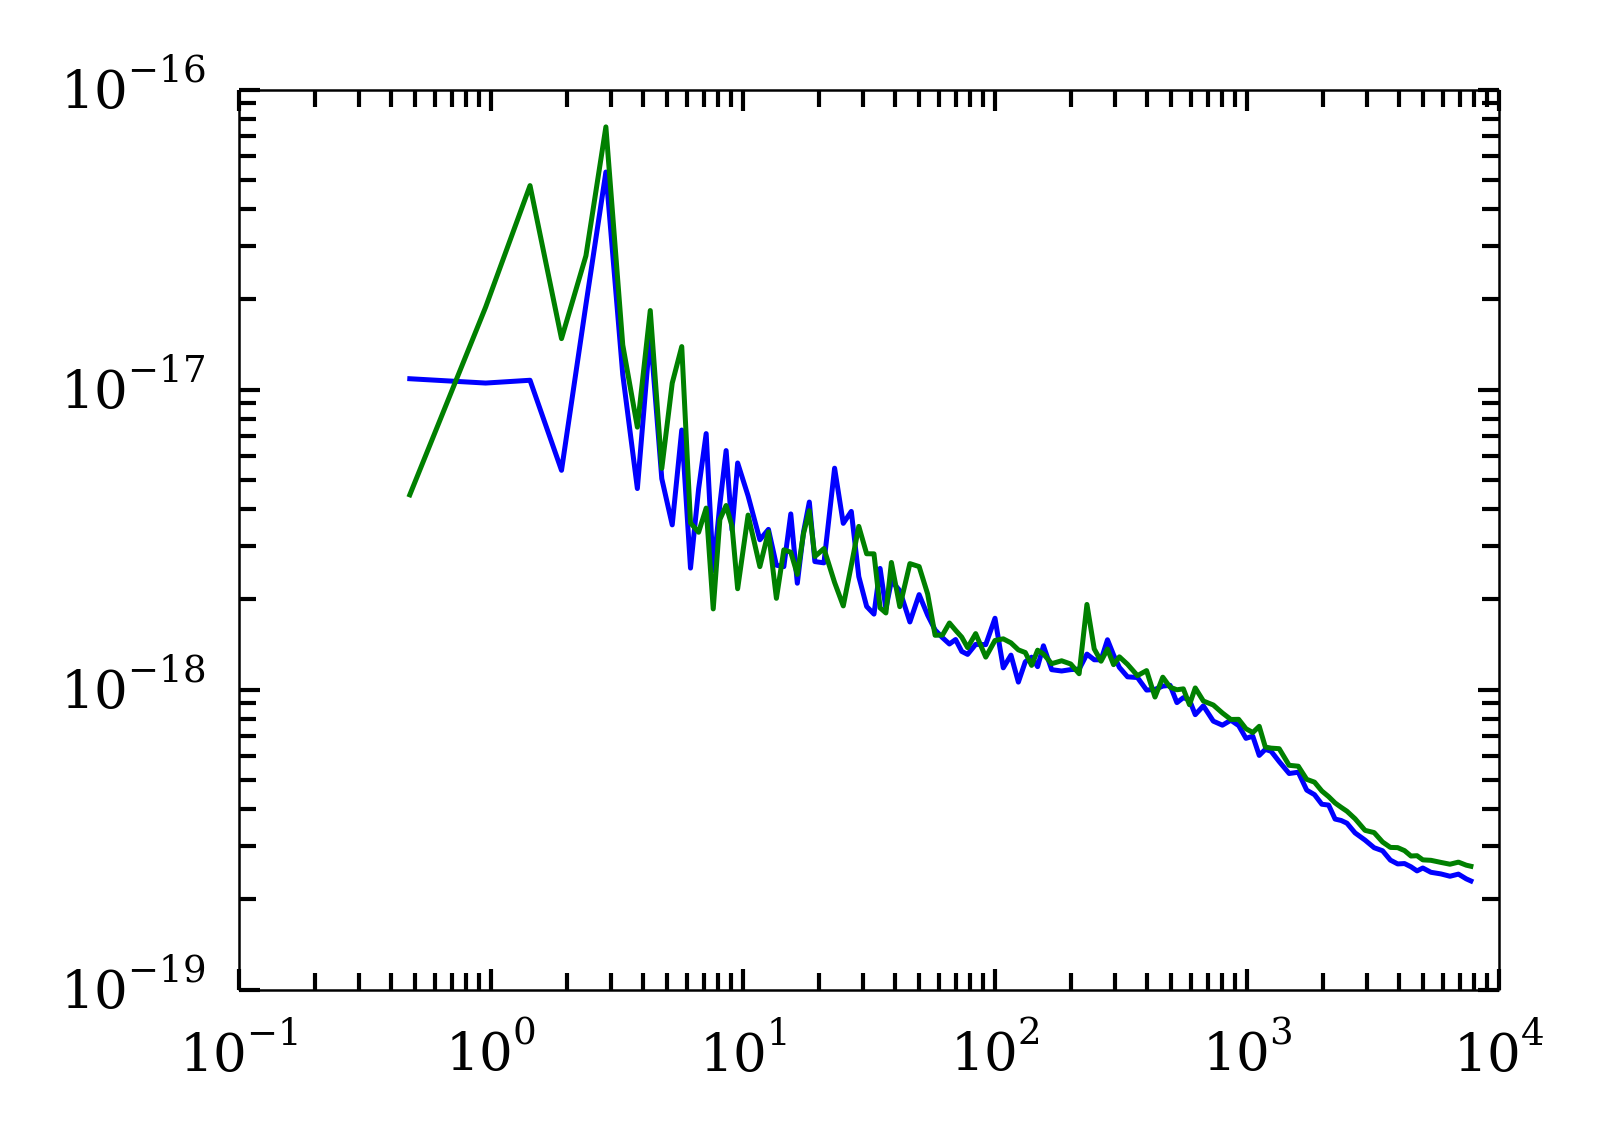

In [28]:
plt.loglog(bbz['f'], bbz['16_dev'])
plt.loglog(cwz['f'], cwz['17_dev'])

#plt.loglog(bbz['f'], bbz['16_amp'])
#plt.loglog(bbz['f'], bbz['16_sigma'])
